## **Flight Price Prediction**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [26]:
df=pd.read_excel("Flight_price.xlsx")

In [9]:
# !pip install openpyxl

In [25]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dept_hr,Dept_min,Arrival_hr,Arrival_min,Duration(in min)
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,No info,12648,1,3,11,30,14,10,160


In [12]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
df.dropna(inplace = True)

In [14]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### ***EDA***


Looking at the description we can see that the *'Date_of_Journey'* is a object data type so we have to convert it into timestamp to use this column

In [27]:
df['Journey_day']= pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day

In [28]:
df['Journey_month']= pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [29]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [32]:
df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [18]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [19]:
#Similar to the Date_of_Journey we need to extract values from Departure_time as well
df['Dept_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dept_min']=pd.to_datetime(df['Dep_Time']).dt.minute
#Now we can drop Dep_Time as we have extracted the useful values
df.drop(['Dep_Time'],axis = 1,inplace=True)

In [20]:
#Similar to the Date_of_Journey we need to extract values from Arrival_time as well
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
#Now we can drop Dep_Time as we have extracted the useful values
df.drop(['Arrival_Time'],axis = 1,inplace=True)

In [21]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df['Duration(in min)'] = (df['Duration'].dt.total_seconds() / 60).astype(int)
df.drop('Duration', axis = 1, inplace = True)


In [22]:
for i,data in df.iterrows():
  if data['Total_Stops']=='1 stop':
    df.at[i,'Total_Stops']=1
  if data['Total_Stops']=='non-stop':
    df.at[i,'Total_Stops']=0
  if data['Total_Stops']=='2 stops':
    df.at[i,'Total_Stops']=2
  if data['Total_Stops']=='3 stops':
    df.at[i,'Total_Stops']=3
  if data['Total_Stops']=='4 stops':
    df.at[i,'Total_Stops']=4


In [23]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dept_hr,Dept_min,Arrival_hr,Arrival_min,Duration(in min)
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,285


In [24]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

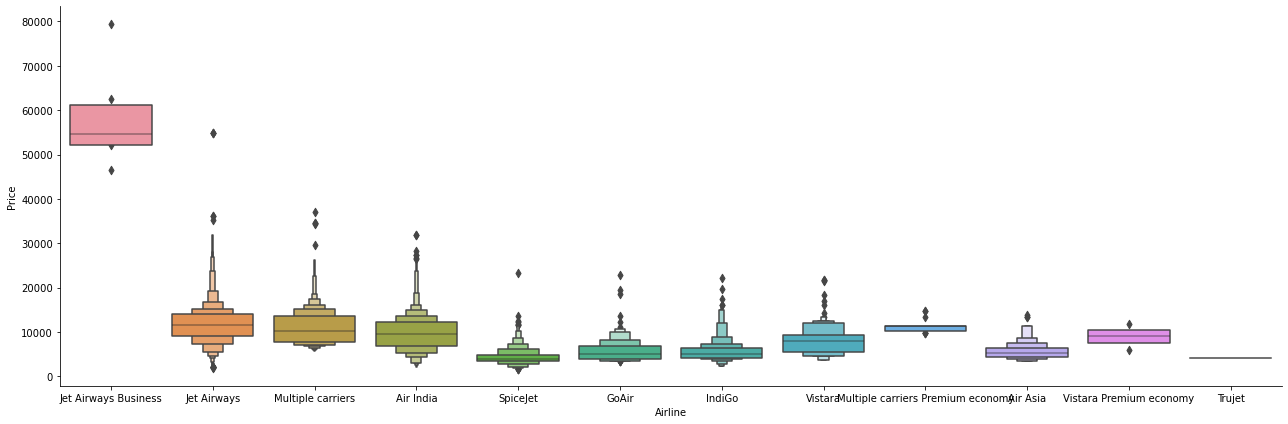

In [19]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect=3 )
plt.show()

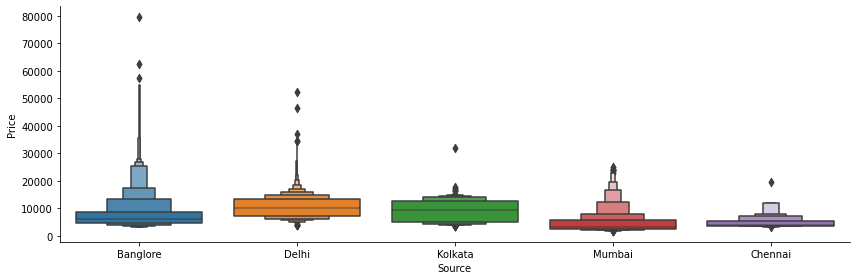

In [20]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [21]:
#One hot encoding on Source, Airline and Destination
import pandas as pd
df_new = pd.get_dummies(df,columns=['Destination','Source','Airline'])    
df_new.head()

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dept_hr,Dept_min,Arrival_hr,Arrival_min,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,...,0,1,0,0,0,0,0,0,0,0
1,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,...,0,0,0,0,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,0,0,0,0,0
3,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,...,0,1,0,0,0,0,0,0,0,0
4,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,...,0,1,0,0,0,0,0,0,0,0


In [22]:
# As as the info from the Route can derived from the total no of stops therefore we can drop the Route columns
df_new.drop(['Route','Additional_Info'],axis=1,inplace= True)

### **Feature Selection**

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

In [23]:
df_new.shape

(10682, 32)

In [24]:
df_new.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dept_hr',
       'Dept_min', 'Arrival_hr', 'Arrival_min', 'Duration(in min)',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [25]:
X = df_new.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dept_hr',
       'Dept_min', 'Arrival_hr', 'Arrival_min', 'Duration(in min)',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dept_hr,Dept_min,Arrival_hr,Arrival_min,Duration(in min),Destination_Banglore,Destination_Cochin,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,24,3,22,20,1,10,170,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1,5,5,50,13,15,445,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,6,9,25,4,25,1140,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,12,5,18,5,23,30,325,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,3,16,50,21,35,285,0,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
y = df_new.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

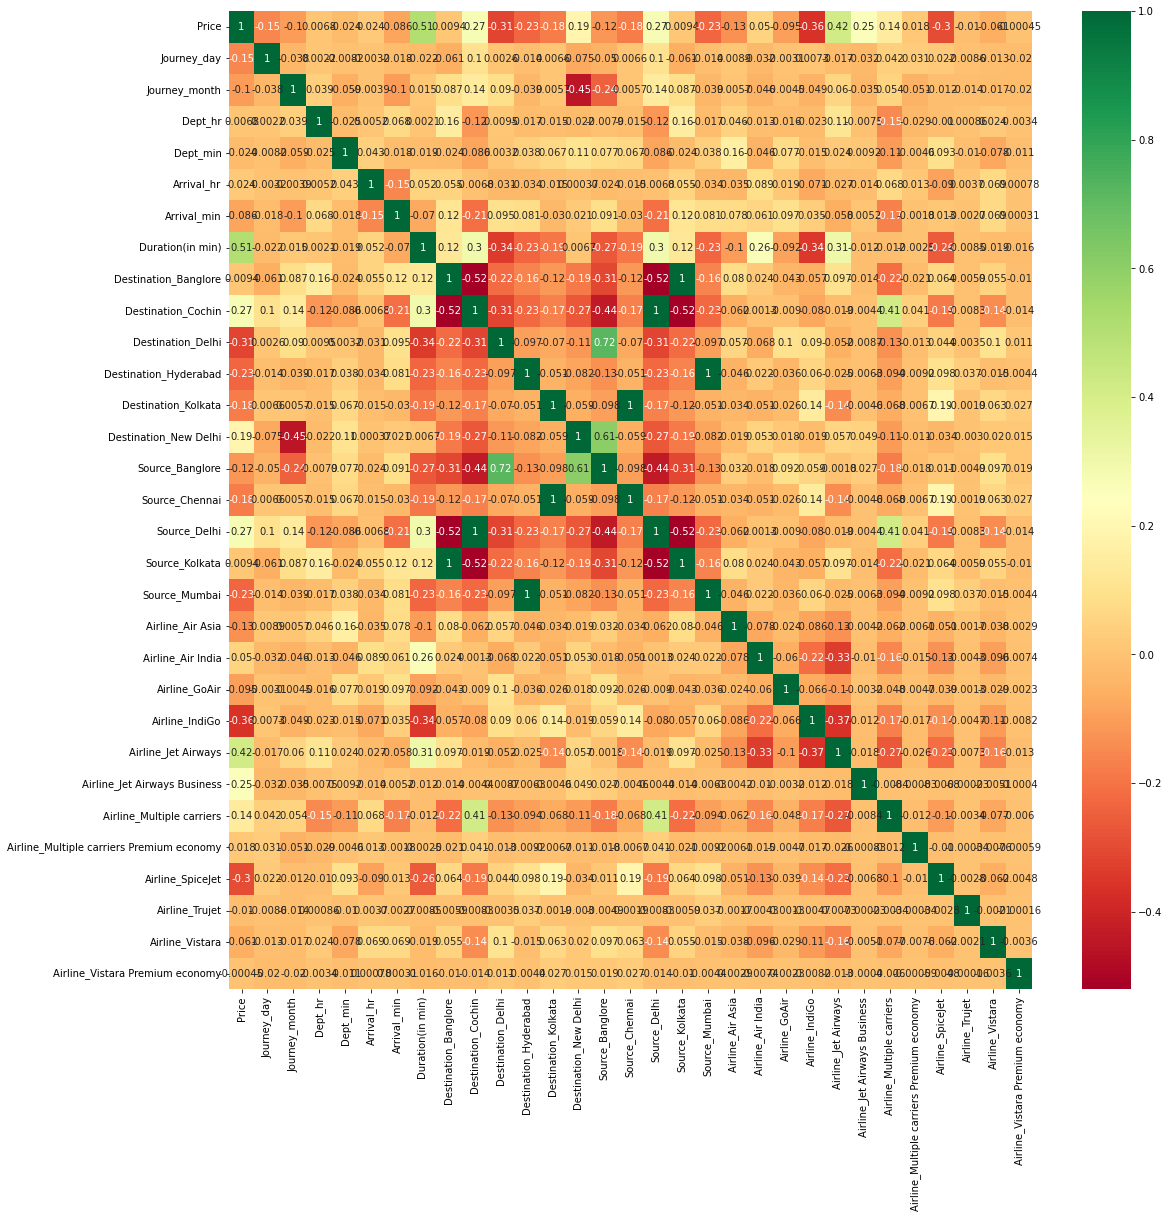

In [28]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df_new.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [28]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [31]:
print(selection.feature_importances_)

NameError: name 'selection' is not defined

In [32]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

NameError: name 'selection' is not defined

<Figure size 864x576 with 0 Axes>

###**Fitting model using Random Forest**



In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_pred = reg_rf.predict(X_test)

In [34]:
reg_rf.score(X_train,y_train)

0.9523678244316581

In [35]:
reg_rf.score(X_test, y_test)

0.821115382591961

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


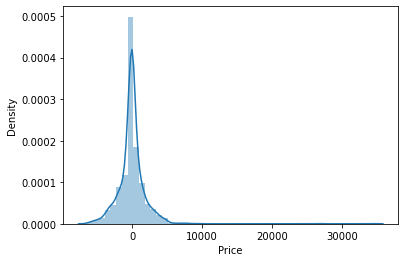

In [36]:
sns.distplot(y_test-y_pred)
plt.show()

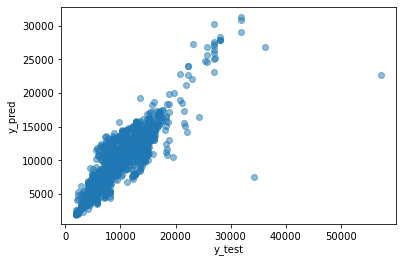

In [37]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [54]:
from sklearn import metrics

In [39]:
metrics.r2_score(y_test, y_pred)

0.821115382591961

###**Hyperparameter Tuning**

we are using RandomizedSearchCV

In [40]:
from sklearn.model_selection import RandomizedSearchCV


In [41]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [42]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [43]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,  random_state=42, n_jobs = 1)

In [44]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [46]:
prediction = rf_random.predict(X_test)

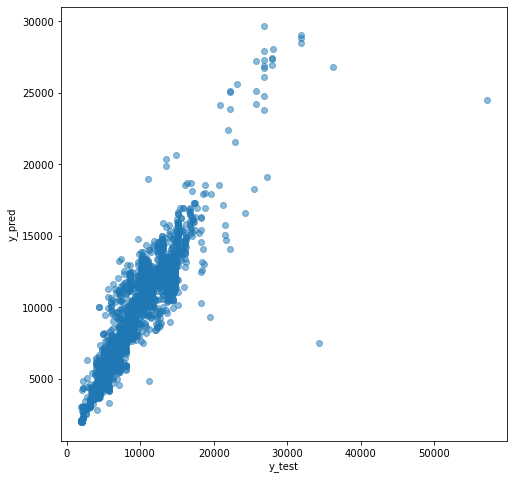

In [47]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [48]:
metrics.r2_score(y_test,prediction)

0.836288628514955

In [49]:
from sklearn.svm import SVC
svc = SVC(kernel='poly', gamma=1.0)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

NameError: name 'accuracy_score' is not defined

In [ ]:
print("Accuracy - ",accuracy)
print("Precision - ",precision)

In [ ]:

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)


In [53]:
from sklearn.metrics import accuracy_score,precision_score


In [63]:
y_pred
#y_test
# prediction
# metrics.r2_score(y_test,y_pred)

array([10262, 10262, 10262, ..., 10262, 10262, 10262], dtype=int64)

In [ ]:
# from sklearn.svm import SVC
# svc = SVC(kernel='poly', gamma=1.0)
# svc.fit(X_train,y_train)
# y_pred1 = svc.predict(X_test)

In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50,random_state=2)

xgb.fit(X_train,y_train) 
xgb1_yhat=xgb.predict(X_test) 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
X_train=X_train.astype({'Total_Stops':int})

In [55]:
metrics.r2_score(y_test,xgb1_yhat)

0.6582524979135831

In [56]:
y_train

10005     9149
3684     12373
1034      5583
3909      7695
3088     11972
         ...  
5734     12242
5191     10844
5390      7670
860       6144
7270     10262
Name: Price, Length: 8545, dtype: int64

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {

    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,

}


In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    
    return print(metrics.r2_score(y_test,xgb1_yhat))

In [64]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
metrics.r2_score(y_test,y_pred)

0.5215623706066229

In [68]:
gbdt.fit(X_train,y_train)
y_pred = gbdt.predict(X_test)
metrics.r2_score(y_test,y_pred)


KeyboardInterrupt: 